In [1]:
import cv2
import numpy as np
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plantcv.learn import train_kmeans

In [5]:
# Set input variables
args = WorkflowInputs(images=[r"C:\Cantonese\real\crop_side.png"],
                      names="image",
                      result="plantcv_results.csv",
                      debug="plot")

# Set variables
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 0.5
pcv.params.text_thickness = 2

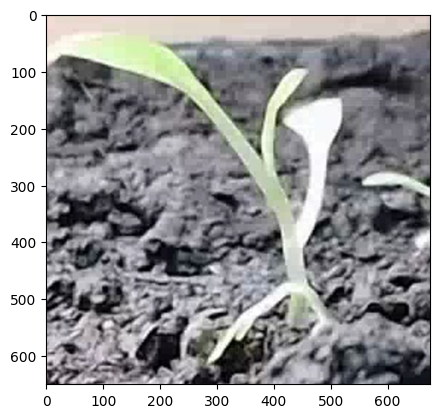

In [6]:
img, imgpath, imgname = pcv.readimage(filename=args.image)

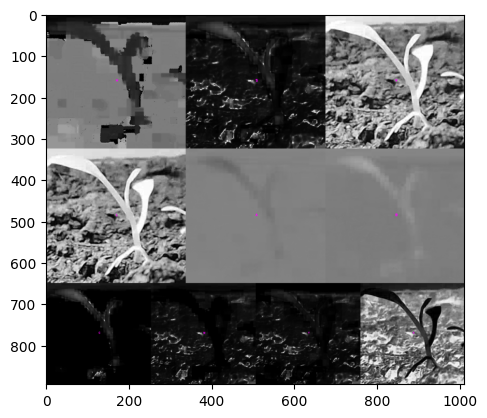

In [7]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

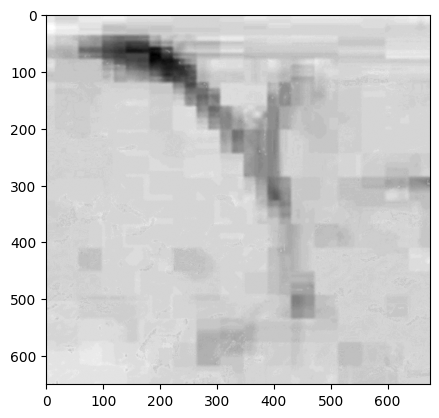

In [8]:
b = pcv.rgb2gray_lab(rgb_img=img, channel='a')

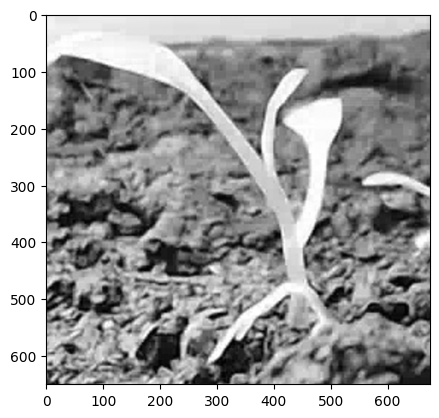

In [10]:
v = pcv.rgb2gray_hsv(rgb_img=img, channel='v')

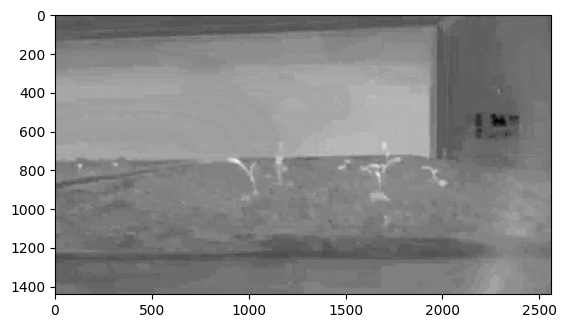

In [6]:
a = pcv.rgb2gray_lab(rgb_img=img, channel='b')

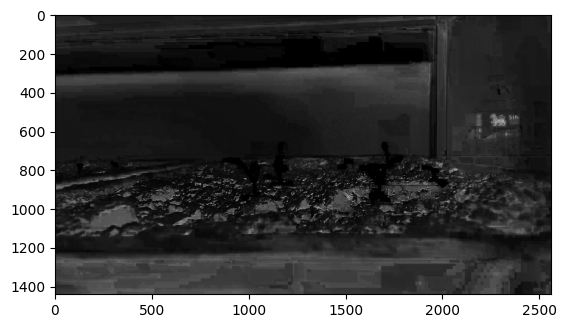

In [8]:
y = pcv.rgb2gray_cmyk(rgb_img=img, channel='m')

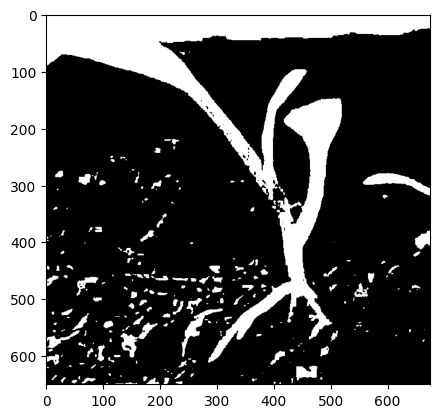

In [12]:
thresh = pcv.threshold.binary(gray_img=v, threshold=200, object_type='light')

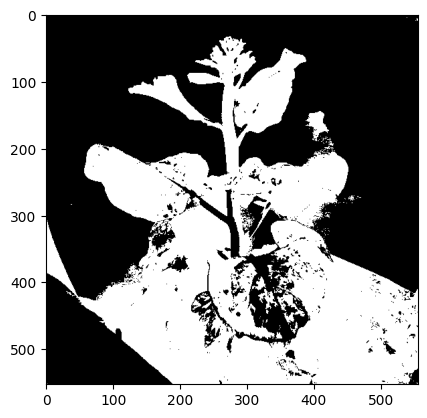

In [26]:
threshold_mean = pcv.threshold.mean(gray_img=a, ksize=501, offset=3,
                                    object_type='dark')

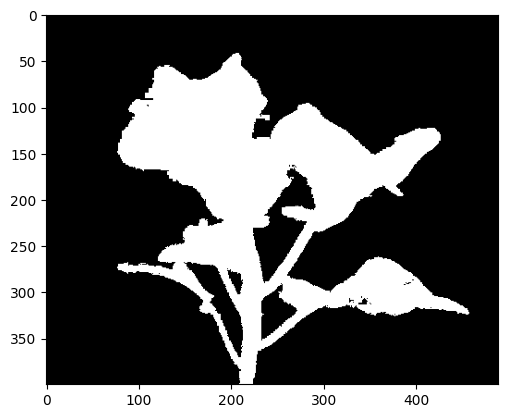

In [9]:
a_fill = pcv.fill(bin_img=threshold_mean, size=200)

There were 2546 objects not annotated.


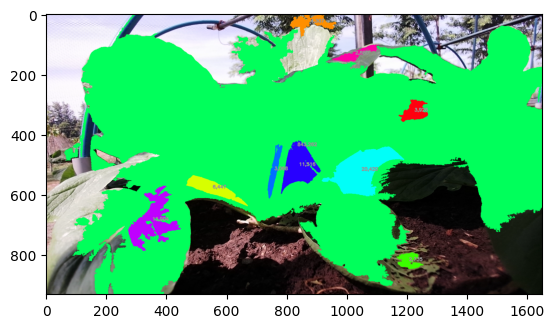

In [19]:
plotting_img = pcv.visualize.obj_sizes(img=img, mask=a_fill, num_objects=10)

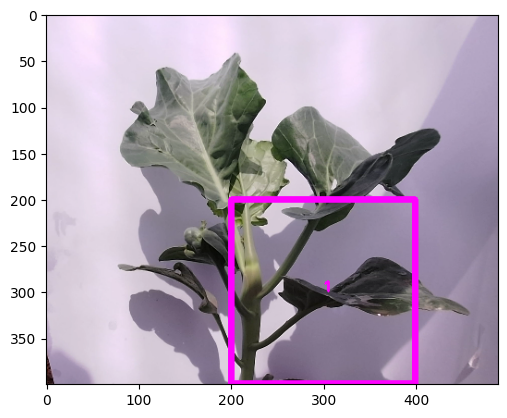

In [13]:
roi = pcv.roi.rectangle(img=img, x=200, y=200, h=200, w=200)

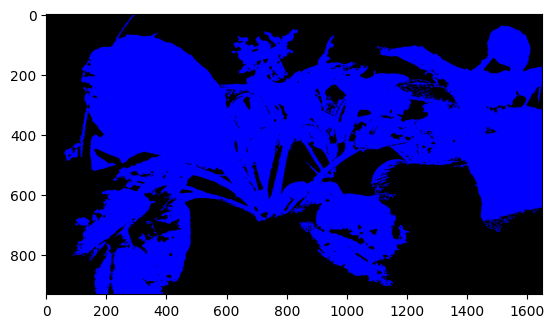

In [22]:
labeled_mask, num_plants = pcv.create_labels(mask=a_fill, rois=roi, roi_type='partial')